# Parametric Statistical Hypothesis Tests
Parametric statistical methods assume that the data has a known and specific distribution, often a Gaussian distribution.

Statistical tests that you can use to compare data samples.

Compare Sample Means (parametric)

1. Student’s t-test
2. Welch's t-test
3. Paired Student’s t-test
4. Analysis of Variance Test (ANOVA)
5. Repeated Measures ANOVA Test

In [22]:
import numpy as np

# seed the random number generator
np.random.seed(1)

# generate two sets of univariate observations
# data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
# data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]

data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 51

# summarize
print('data1: mean=%.3f stdv=%.3f' % (np.mean(data1), np.std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (np.mean(data2), np.std(data2)))

data1: mean=50.303 stdv=4.426
data2: mean=51.764 stdv=4.660


# 1. Student’s t-test

The Student’s t-test is a statistical hypothesis test that two independent data samples known to have a Gaussian distribution, have the same Gaussian distribution, named for William Gosset, who used the pseudonym “Student“.

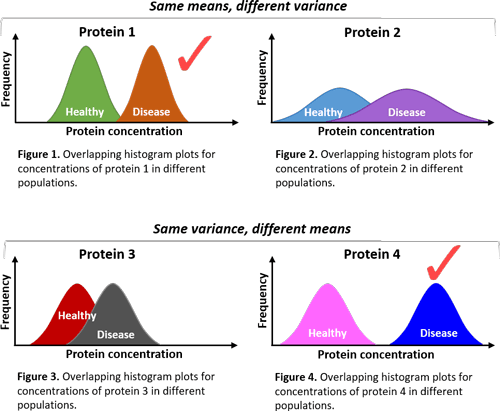

In [23]:
'''
Tests for a Student’s t-distribution, whether the means of two independent samples are significantly different.

In a normally distributed population where standard deviation in unknown and sample size is comparatively small.

## Assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

## Interpretation
H0: the means of the samples are equal.
H1: the means of the samples are unequal.

## Python Code
# Example of the Student's t-test
'''
from scipy.stats import ttest_ind

stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

stat=-2.262, p=0.025
Different distributions (reject H0)


# 2. Welch’s T-test

("Welch's unequal variances t-test" or "unequal variances t-test") tests for equality of means between two population samples.

In [9]:
'''
Welch's t-test, or unequal variances t-test, is a two-sample location test which is used to test the hypothesis that
two populations have equal means, named for Bernard Lewis Welch, and is an adaptation of Student's t-test.

It is more reliable when the two samples have unequal variances and/or unequal sample sizes.

These tests are often referred to as "unpaired" or "independent samples" t-tests, as they are typically applied when
the statistical units underlying the two samples being compared are non-overlapping.
'''
from scipy.stats import ttest_ind, norm

data1 = norm.rvs(loc=5,scale=10,size=500)
data3 = norm.rvs(loc=5, scale=20, size=100)

stat, p = ttest_ind(data1, data3, equal_var = False)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

stat=-1.102, p=0.273
Same distributions (fail to reject H0)


# 3. Paired Student’s t-test
Tests whether the means of two paired samples are significantly different.

In [4]:
'''
A dependent samples t test is also used to compare two means on a single dependent variable.
Unlike the independent samples test, however, a dependent samples t test is used to compare the means of a single sample or
of two matched or paired samples.

## Assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Observations across each sample are paired.

## Interpretation
H0: the means of the samples are equal.
H1: the means of the samples are unequal.

## Python Code
# Example of the Paired Student's t-test
'''
from scipy.stats import ttest_rel

stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

stat=0.200, p=0.842
Same distributions (fail to reject H0)


# 4. Analysis of Variance Test (ANOVA)
Tests whether the means of two or more independent samples are significantly different.
Often used similarly to a t-test, but for more than two groups.

In [3]:
'''
ANOVA is a statistical test that assumes that the mean across 2 or more groups are equal

The purpose of a one-way analysis of variance (one-way ANOVA) is to compare the means of
two or more groups (the independent variable) on one dependent variable to see if the group means are 
significantly different from each other.

## Assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.

## Interpretation
H0: the means of the samples are equal.
H1: one or more of the means of the samples are unequal.

## Python Code
# Example of the Analysis of Variance Test
'''
# generate three independent samples
data1 = 5 * np.random.randn(100) + 50
data2 = 5 * np.random.randn(100) + 50
data3 = 5 * np.random.randn(100) + 52

# data1 = [0.873, 2.817, 0.121, -0.945, -0.055, -1.436, 0.360, -1.478, -1.637, -1.869]
# data2 = [1.142, -0.432, -0.938, -0.729, -0.846, -0.157, 0.500, 1.183, -1.075, -0.169]
# data3 = [-0.208, 0.696, 0.928, -1.148, -0.213, 0.229, 0.137, 0.269, -0.870, -1.204]

from scipy.stats import f_oneway

stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

stat=6.812, p=0.001
Different distributions (reject H0)


# 5. Repeated Measures ANOVA Test
Tests whether the means of two or more paired samples are significantly different.

In [ ]:
'''
Repeated-measures ANOVA has a number of advantages over paired t tests, however.
First, with repeated-measures ANOVA, we can examine differences on a dependent variable that has been measured at
more than two time points, whereas with an independent t test we can only compare scores on a dependent variable from
two time points.

## Assumptions
Observations in each sample are independent and identically distributed (iid).
Observations in each sample are normally distributed.
Observations in each sample have the same variance.
Observations across each sample are paired.

## Interpretation
H0: the means of the samples are equal.
H1: one or more of the means of the samples are unequal.

## Python Code
Currently not supported in Python.
'''